##### Machine learning end to  end project in python 
##### Heart disease detection using ML classifier


## Problem Statement

We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a model which tries predict if a patient has this disease or not.


## Objective

To make a web application that will detect that whether a person has heart disease or not

##### 1. load dataset
##### 2. feature engineering
##### 3. feature selection
##### 4. feature scaling
##### 5. model selection
##### 6. save model
##### 7. deploy machine learning model

### Importing libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### load dataset

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head(3)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1

* age ------  age in years
* sex ------  1 = male, 0 = female
* cp -------  chest pain type
* trestbps--  resting blood pressure (in mm Hg on admission to the hospital)
* chol -----  serum cholestoral in mg/dl
* fbs ------  (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
* restecg --  resting electrocardiographic result
* thalach --  maximum heart rate achieved
* exang ----  exercise induced angina (1 = yes; 0 = no)
* oldpeak --  ST depression induced by exercise relative to rest
* slope ----  the slope of the peak exercise ST segment
* ca -------  number of major vessels (0-3) colored by flourosopy
* thal -----  1 = normal, 2 = fixed defect, 3 = reversable defect


In [4]:
df.shape

(303, 14)

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

### feature scalling

In [7]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])# creating dummy variable
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] # we have taken these columns for scale down
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [8]:
dataset.head(2)

age  trestbps      chol   thalach   oldpeak  target  sex_0  sex_1  \
0  0.952197  0.763956 -0.256334  0.015443  1.087338       1      0      1   
1 -1.915313 -0.092738  0.072199  1.633471  2.122573       1      0      1   

   cp_0  cp_1  ...  slope_2  ca_0  ca_1  ca_2  ca_3  ca_4  thal_0  thal_1  \
0     0     0  ...        0     1     0     0     0     0       0       1   
1     0     0  ...        0     1     0     0     0     0       0       0   

   thal_2  thal_3  
0       0       0  
1       1       0  

[2 rows x 31 columns]

In [9]:
dataset.tail(2)

age  trestbps      chol   thalach   oldpeak  target  sex_0  sex_1  \
301  0.290464 -0.092738 -2.227533 -1.515125  0.138373       0      0      1   
302  0.290464 -0.092738 -0.198357  1.064975 -0.896862       0      1      0   

     cp_0  cp_1  ...  slope_2  ca_0  ca_1  ca_2  ca_3  ca_4  thal_0  thal_1  \
301     1     0  ...        0     0     1     0     0     0       0       0   
302     0     1  ...        0     0     1     0     0     0       0       0   

     thal_2  thal_3  
301       0       1  
302       1       0  

[2 rows x 31 columns]

In [10]:
dataset.describe()

age      trestbps          chol       thalach       oldpeak  \
count  3.030000e+02  3.030000e+02  3.030000e+02  3.030000e+02  3.030000e+02   
mean   5.825923e-17 -7.146832e-16 -9.828955e-17 -5.203025e-16 -3.140136e-16   
std    1.001654e+00  1.001654e+00  1.001654e+00  1.001654e+00  1.001654e+00   
min   -2.797624e+00 -2.148802e+00 -2.324160e+00 -3.439267e+00 -8.968617e-01   
25%   -7.572802e-01 -6.638668e-01 -6.814943e-01 -7.061105e-01 -8.968617e-01   
50%    6.988599e-02 -9.273778e-02 -1.210553e-01  1.466343e-01 -2.067053e-01   
75%    7.316189e-01  4.783913e-01  5.456738e-01  7.151309e-01  4.834512e-01   
max    2.496240e+00  3.905165e+00  6.140401e+00  2.289429e+00  4.451851e+00   

           target       sex_0       sex_1        cp_0        cp_1  ...  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  ...   
mean     0.544554    0.316832    0.683168    0.471947    0.165017  ...   
std      0.498835    0.466011    0.466011    0.500038    0.371809  ...   
min      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
50%      1.000000    0.000000    1.000000    0.000000    0.000000  ...   
75%      1.000000    1.000000    1.000000    1.000000    0.000000  ...   
max      1.000000    1.000000    1.000000    1.000000    1.000000  ...   

          slope_2        ca_0        ca_1        ca_2        ca_3        ca_4  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.468647    0.577558    0.214521    0.125413    0.066007    0.016502   
std      0.499842    0.494765    0.411169    0.331734    0.248704    0.127605   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
75%      1.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           thal_0      thal_1      thal_2      thal_3  
count  303.000000  303.000000  303.000000  303.000000  
mean     0.006601    0.059406    0.547855    0.386139  
std      0.081110    0.236774    0.498528    0.487668  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    1.000000    0.000000  
75%      0.000000    0.000000    1.000000    1.000000  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 31 columns]

### visualisation

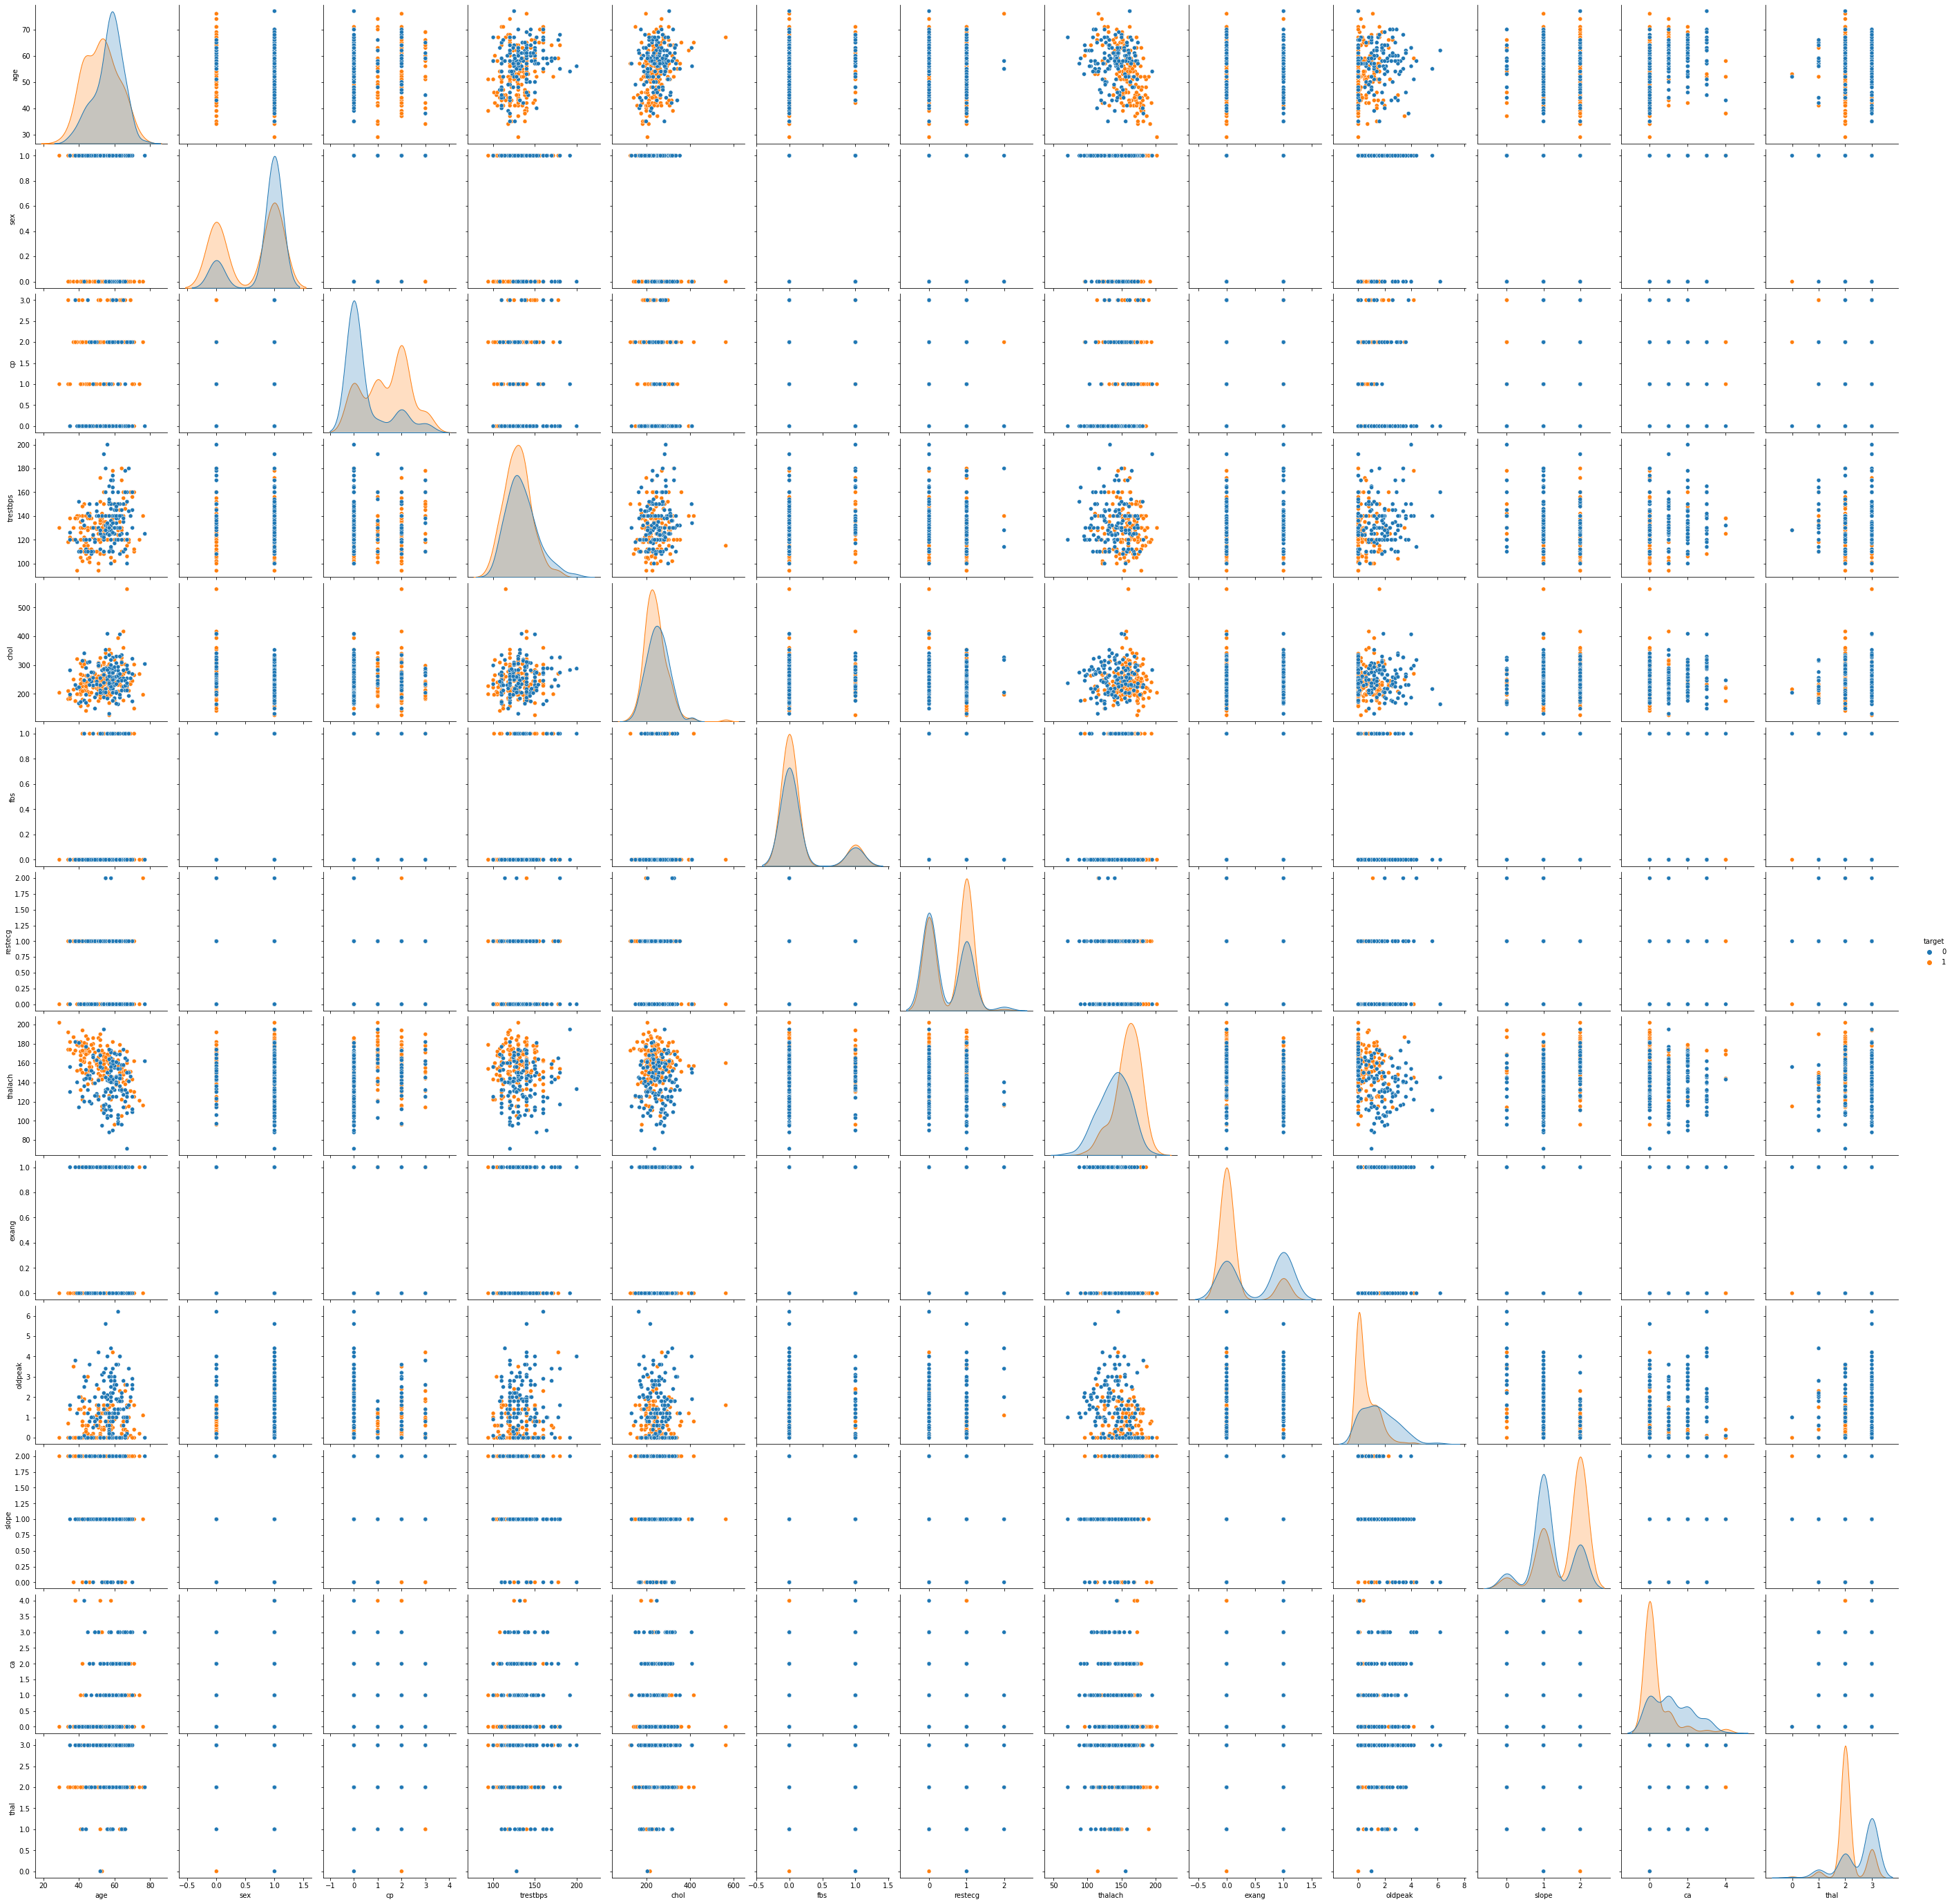

In [11]:
sns.pairplot(df , hue="target", height=3, aspect=1);

### model selection

In [ ]:
# by above different graphs we can observe KNN should be best model for this problem
y = dataset['target']
X = dataset.drop(['target'], axis = 1) 
X.head()

In [ ]:
from sklearn.model_selection import train_test_split


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 5)  

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### K – Nearest Neighbor Classifier

In [16]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(X_train, y_train)
score=cross_val_score(knn_classifier,X_train,y_train,cv=10)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.8852459016393442

In [17]:
score.mean()

0.7933333333333332

In [18]:
knn_classifier  = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
 metric_params=None, n_jobs=1, n_neighbors=5, p=1,
 weights='uniform')
knn_classifier.fit(X_train, y_train)
score=cross_val_score(knn_classifier,X_train,y_train,cv=10) #The cross_val_score() function will be used to perform the evaluation,
                                              #taking the dataset and cross-validation configuration and returning a list of scores calculated for each fold
y_pred_knn = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.8688524590163934

In [19]:
score=cross_val_score(knn_classifier,X_train,y_train,cv=10)
score.mean()

0.8145

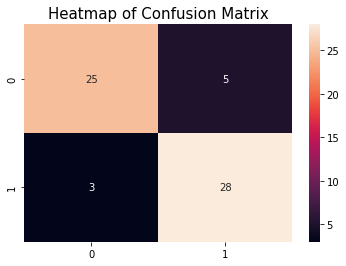

In [20]:
#confustion metrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [21]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        30
           1       0.85      0.90      0.88        31

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



### save model

In [22]:
## Pickle
#from xgboost import XGBClassifier
import pickle

# save model
pickle.dump(knn_classifier, open('model_final.pkl', 'wb'))

# load model
Heart_disease_detector_model = pickle.load(open('model_final.pkl', 'rb'))

# predict the output
y_pred = Heart_disease_detector_model.predict(X_test)

# confusion matrix
print('Confusion matrix of K – Nearest Neighbor model: \n',confusion_matrix(y_test, y_pred),'\n')

# show the accuracy
print('Accuracy of K – Nearest Neighbor  model = ',accuracy_score(y_test, y_pred))

Confusion matrix of K – Nearest Neighbor model: 
 [[25  5]
 [ 3 28]] 

Accuracy of K – Nearest Neighbor  model =  0.8688524590163934


In [23]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1